In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.activations import relu,softmax
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

/home/michael/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataframe = pd.read_csv('train (3).csv')

In [3]:
def plot_image(images):
    plt.figure(figsize=(5,5))
    
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        plt.colorbar()
        

In [4]:
images = (dataframe.iloc[:,1:].values).astype('float32')/255
labels = (dataframe.label.values).astype('int32')

In [5]:
reshaped_image = images.reshape(dataframe.shape[0],28,28)

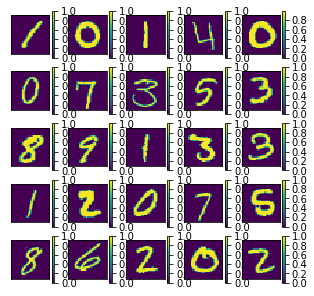

In [6]:
plot_image(reshaped_image)

In [7]:
train_images = images.reshape(dataframe.shape[0],28,28,1)

In [8]:
train_labels = to_categorical(labels,num_classes=10)

from sklearn.model_selection import train_test_split

In [9]:
train_images, val_images, train_labels,val_labels = train_test_split(train_images,train_labels,test_size= 0.1,random_state = 42)

In [10]:
def cnn():
    model = Sequential()
    model.add(Conv2D(32,(3,3),strides=(2,2),padding='same',input_shape=(28,28,1),activation=relu))
    model.add(Conv2D(32,(3,3),strides=(2,2),padding='same',activation=relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3),strides=(2,2),padding='same',activation=relu))
    model.add(Conv2D(64, (3,3),strides=(2,2),padding='same',activation=relu))
    
    model.add(Flatten())
    model.add(Dense(512,activation=relu))
    model.add(Dense(10,activation=softmax))
    
    return model


In [11]:
model = cnn()

In [12]:
model.compile(optimizer=Adam(),loss=categorical_crossentropy,metrics=['accuracy'])

In [13]:
generator = ImageDataGenerator()

In [14]:
BATCH_SIZE = 1000
train_batches = generator.flow(train_images,train_labels,batch_size=BATCH_SIZE)
val_batches = generator.flow(val_images, val_labels, batch_size= BATCH_SIZE)

In [53]:
history = model.fit_generator(train_batches,steps_per_epoch=train_batches.n,epochs=2,validation_data=val_batches,validation_steps=val_batches.n)


Epoch 1/2
   60/37800 [..............................] - ETA: 1:29:28 - loss: 1.2708 - acc: 0.6030

KeyboardInterrupt: 